<a href="https://colab.research.google.com/github/Whaleman0423/Machine_Learning/blob/main/ML_video_boston_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
# 轉成csv 存起來
df.to_csv("boston.csv", encoding="utf-8", index=False)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


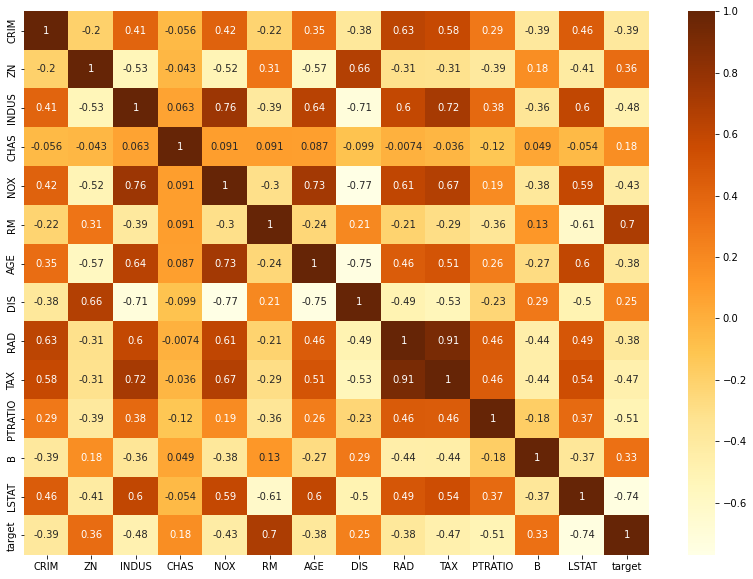

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14,10))
sns.heatmap(df.astype("float").corr(), cmap="YlOrBr", annot=True)

In [ ]:
df.corr() # 取出相關係數

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# 切資料
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1),df['target'], test_size=0.1)
# 90%訓練 10%驗證 90%訓練答案 10%訓練答案

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

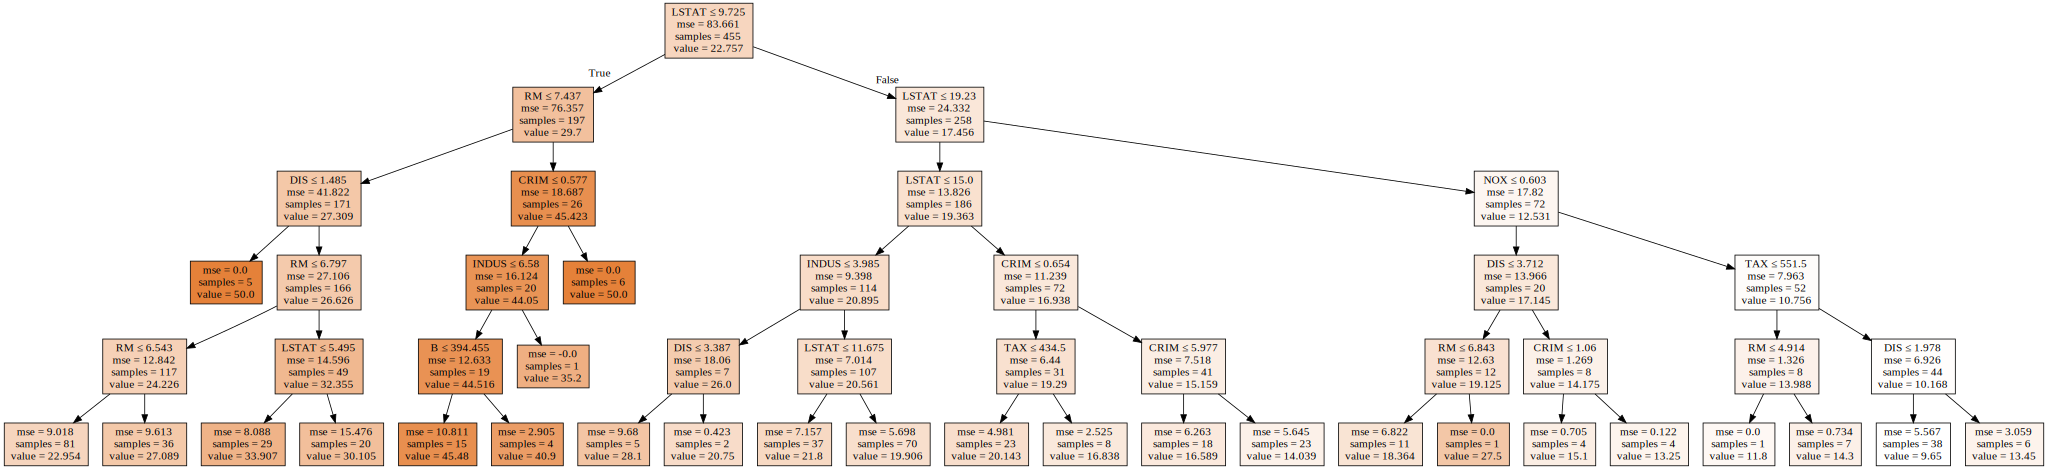

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, 
          out_file=None, 
          feature_names=boston["feature_names"],
          filled=True,
          special_characters=True)
# g
graph = graphviz.Source(g)
graph

In [ ]:
pre = reg.predict(x_test)
# pre
print("預測結果：", list(pre))
print("實際結果：", list(y_test))
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
print("r2 score：", r2_score(y_test, pre))

預測結果： [16.58888888888889, 14.039130434782608, 19.905714285714282, 27.088888888888892, 21.8, 20.75, 45.480000000000004, 22.954320987654313, 16.58888888888889, 16.58888888888889, 27.088888888888892, 9.65, 21.8, 9.65, 27.088888888888892, 16.58888888888889, 30.105000000000008, 45.480000000000004, 16.58888888888889, 22.954320987654313, 14.3, 19.905714285714282, 19.905714285714282, 15.1, 14.039130434782608, 19.905714285714282, 21.8, 18.363636363636363, 9.65, 18.363636363636363, 21.8, 22.954320987654313, 14.3, 19.905714285714282, 21.8, 22.954320987654313, 19.905714285714282, 22.954320987654313, 19.905714285714282, 22.954320987654313, 21.8, 19.905714285714282, 30.105000000000008, 40.9, 21.8, 20.75, 19.905714285714282, 9.65, 20.143478260869564, 9.65, 50.0]
實際結果： [15.2, 13.1, 10.9, 24.8, 15.0, 19.4, 50.0, 22.2, 14.3, 14.1, 29.0, 10.2, 21.8, 13.3, 24.0, 14.3, 36.1, 50.0, 12.7, 20.6, 17.8, 16.8, 21.0, 20.0, 14.5, 21.8, 18.6, 13.3, 7.2, 17.2, 20.3, 20.6, 14.4, 24.4, 23.0, 24.7, 17.1, 20.3, 18.9, 24

##### R**2 score = 1 - a/b 